# HW2-Problem 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Let us assume we have a distribution of electric charges and want to calculate the resulting
electric field, remembering that the electric field is the gradient of the electric potential. Calculate
and plot the electric potential and the electric field for the following charge distributions on a 1 m
x 1 m grid. You can assume the distributions are centered on the origin. Make sure to justify your
choice of integrator and N.<br>

a) Three equal charges arranged in an equilateral triangle 10 cm on a side.


We know that electric potential V is given by:<br>
$$V=\frac{kQ}{|r|}$$ where $k=8.99\times10^9 Nm^{-2}$, Q-charge, and r is the distance to the charge<br>

where $$r=\sqrt{(x-x')^2+(y-y')^2+z'^2}$$
and $x',y',z'$ denote the x,y and z positions of a single charge. Note that we are measuring the <br>
potential wrt xy plane in a $(1m \times 1m)$ grid.
The electric field is given by $$E=\nabla.V=-\frac{kQ}{|r|^2}$$

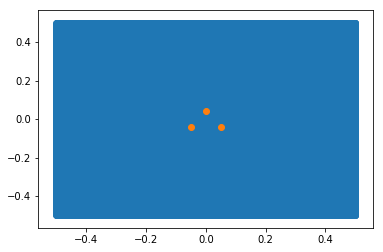

In [2]:
#Suppose we have 3 charges of 1C
Q=1

#No of points across each axes
N=1000

#seperation between two points
dx=1/N

#x positions
x=np.linspace(-0.5,0.5,1000)

#y positions
y=np.linspace(-0.5,0.5,1000)

#create a grid with x and y positions
X,Y=np.meshgrid(x,y)

xq=np.array([-0.1*np.cos(np.pi/3),0.0,0.1*np.cos(np.pi/3)])
yq=np.array([-0.1*0.5*np.sin(np.pi/3),0.1*0.5*np.sin(np.pi/3),-0.1*0.5*np.sin(np.pi/3)])

plt.scatter(X,Y,alpha=0.3)
plt.scatter(xq,yq)


In [3]:
#Electromagnetic Potential V
def V(x,y,Q,xp,yp,zp):
    '''Calculates the Electromagnetic Potential'''
    '''Input: x,y, charge, x,y positions of the charge'''
    k=8.99e9
    term=(x-xp)*(x-xp)+(y-yp)*(y-yp)+(-zp)*(-zp)
    #Calculate the distance between the charge and the point
    r=np.abs(np.sqrt(term))
    return k*Q/r

#Vectorize the function
V=np.vectorize(V)

#Calculate the total potential due to 3 charges
Potential=V(X,Y,Q,xq[0],yq[0],0)+V(X,Y,Q,xq[1],yq[1],0)+V(X,Y,Q,xq[2],yq[2],0)

Potential=np.log(Potential)


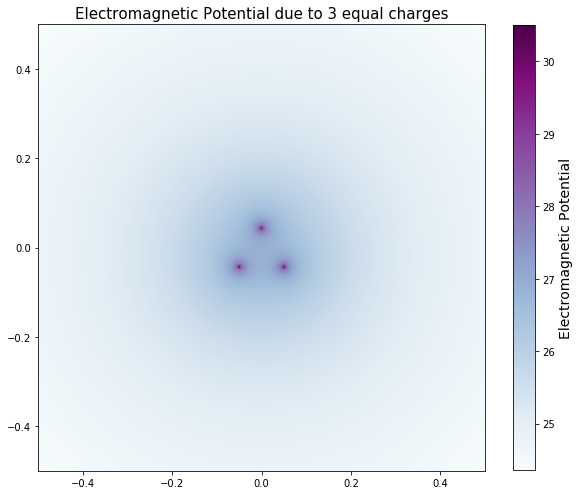

In [4]:
#Let us plot the Electromagnetic potential
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)


image=ax.imshow(Potential, origin='lower',cmap='BuPu',extent=(-0.5, 0.5, -0.5, 0.5))
ax.set_title('Electromagnetic Potential due to 3 equal charges',size=15)
cbar = plt.colorbar(image, pad=0.05,fraction=0.15,shrink=0.82)
cbar.set_label('Electromagnetic Potential', size=14)
plt.show()
fig.savefig('Vcharges.pdf')

In order to get the Electric field we need to differentiate the electromagnetic potential w.r.t x and y
That is $$\vec{E}=\frac{\partial V}{\partial x}\hat{x} + \frac{\partial V}{\partial y}\hat{y}$$

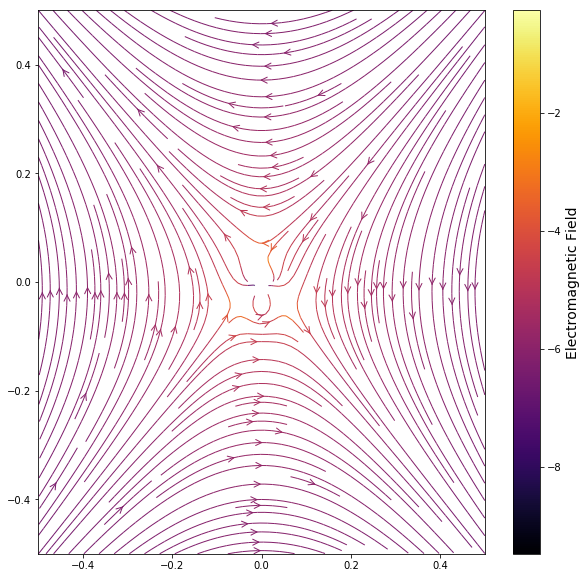

In [5]:
#Calculate E field
E=np.gradient(Potential)
#plt.scatter(E[0],E[1],X)
#plt.show()
ET=np.sqrt(E[0]*E[0]+E[1]*E[1])

fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(111)
color = np.log(ET)
strm=ax1.streamplot(X, Y, E[0], E[1], linewidth=1,color=color, cmap='inferno',density=2, arrowstyle='->', arrowsize=1.5)
colorbar=fig.colorbar(strm.lines)
colorbar.set_label('Electromagnetic Field', size=14)
plt.show()
fig.savefig('Echarges_streamplot.pdf')

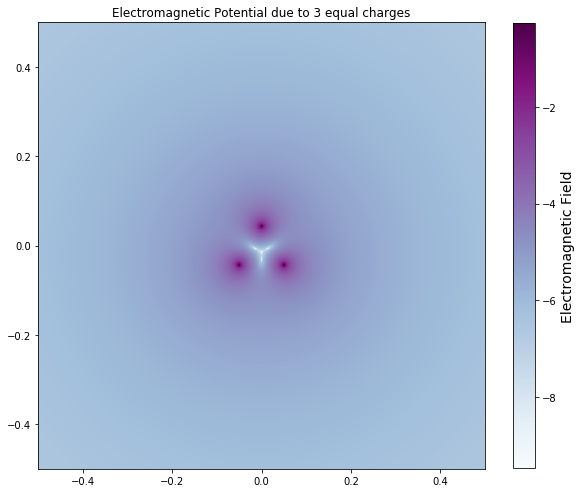

In [6]:
fig=plt.figure(figsize=(10,10))
ax2=fig.add_subplot(111)


image2=ax2.imshow(np.log(ET), origin='lower',cmap='BuPu',extent=(-0.5, 0.5, -0.5, 0.5))

ax2.set_title('Electromagnetic Potential due to 3 equal charges')
cbar2 = plt.colorbar(image2, pad=0.05,fraction=0.15,shrink=0.82)
cbar2.set_label('Electromagnetic Field', size=14)
plt.show()
fig.savefig('Echarges.pdf')

b) Two rings of equal charge with constant charge density in the same plane. One with a radius of 2
cm and one with a radius of 15 cm.

In [7]:
#ring with r=0.02 m & r=0.15 m
r1=0.02
r2=0.15

N=50
dtheta=np.arange(0,2*np.pi,2*np.pi/N)

#Positions for each charge in the ring
dxq1=r1*np.cos(dtheta)
dyq1=r1*np.sin(dtheta)

#ring with r=0.15m

dxq2=r2*np.cos(dtheta)
dyq2=r2*np.sin(dtheta)

In [8]:
Q1=1e9*np.ones(N) #ring 1 charge per particle

#Potential due to each point in ring 1
Vring1=[V(X,Y,Q1[i],dxq1[i],dyq1[i],0) for i in range(N)]

In [9]:
#Potential due to each point in ring 2
Vring2=[V(X,Y,Q1[i],dxq2[i],dyq2[i],0) for i in range(N)]

In [10]:
#Calculate total electromagnetic potential of ring 1
Vring1T = 0
Vring2T=0

for i in range(N):
    Vring1T=Vring1T+Vring1[i]
    Vring2T=Vring2T+Vring2[i]

#Total potential
Vtotal=Vring1T+Vring2T

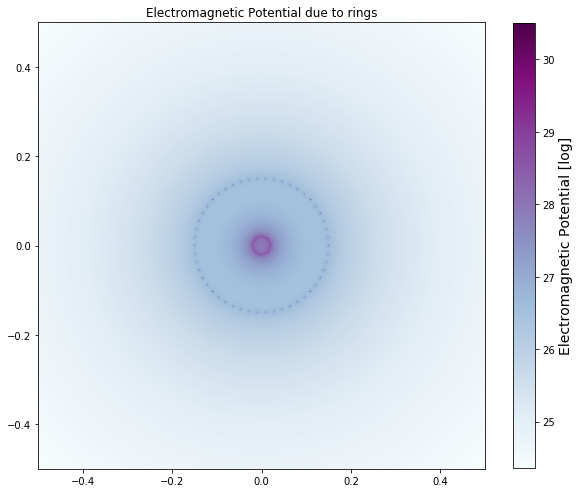

In [11]:
#Create a plot of potenial due to rings
fig=plt.figure(figsize=(10,10))
ax3=fig.add_subplot(111)

Vtotal=np.log(Vtotal)
image2=ax3.imshow(Vtotal, origin='lower',cmap='BuPu',extent=(-0.5, 0.5, -0.5, 0.5))
ax3.set_title('Electromagnetic Potential due to rings')
cbar2 = plt.colorbar(image, pad=0.05,fraction=0.15,shrink=0.82)
cbar2.set_label('Electromagnetic Potential [log]', size=14)
plt.show()

In [12]:
#E field due to rings
E_rings=np.gradient(Vtotal)

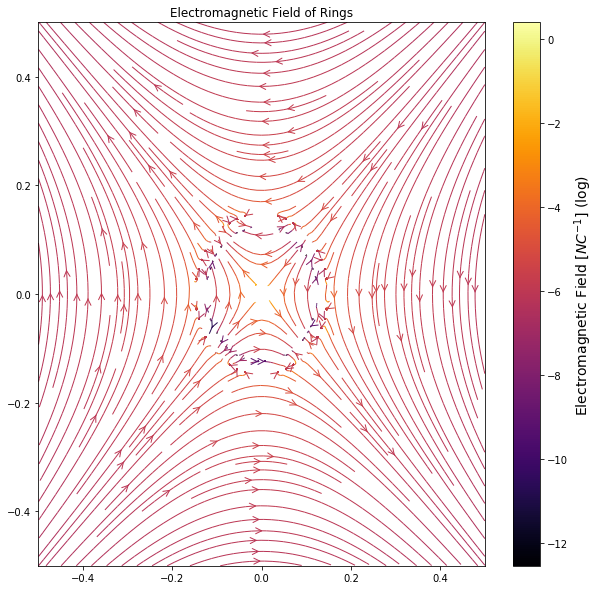

In [47]:
fig=plt.figure(figsize=(10,10))
ax4=fig.add_subplot(111)
color2 = np.log(np.hypot(E_rings[0],E_rings[1]))
strm2=ax4.streamplot(X, Y, E_rings[0], E_rings[1], linewidth=1,color=color2, cmap='inferno',density=2, arrowstyle='->', arrowsize=1.5)
colorbar=fig.colorbar(strm2.lines)
colorbar.set_label('Electromagnetic Field [$N C^{-1}$] (log)', size=14)
ax4.set_title('Electromagnetic Field of Rings')
plt.show()
fig.savefig('Erings_streamplot.pdf')

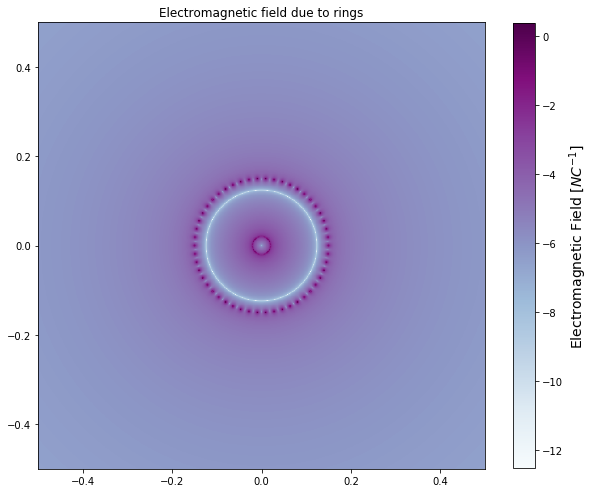

In [14]:
fig=plt.figure(figsize=(10,10))
ax5=fig.add_subplot(111)

Erings_mag=np.hypot(E_rings[0],E_rings[1])
image3=ax5.imshow(np.log(Erings_mag), origin='lower',cmap='BuPu',extent=(-0.5, 0.5, -0.5, 0.5))

ax5.set_title('Electromagnetic field due to rings')
cbar3 = plt.colorbar(image3, pad=0.05,fraction=0.15,shrink=0.82)
cbar3.set_label('Electromagnetic Field [$N C^{-1}$]', size=14)
plt.show()
fig.savefig('Erings.pdf')

c) A plane of charge in the xy plane with a constant charge density which is 10 cm on a side
surrounded by a ring in the xz plane with constant charge density and a radius of 20 cm. You can
assume the plane and the ring have the same total charge. For this one calculate and plot the electric
potential and the electric field in three dimensions.


In [15]:
#Function to calculate the potential in 3D
def Phi(Q,x,y,xp,yp,zp):
    '''Calculates the Electromagnetic Potential'''
    '''Input: x,y,z, & x,y,z positions of the charge'''
    k=8.99e9
    term=(x-xp)*(x-xp)+(y-yp)*(y-yp)+(-zp)*(-zp)
    #Calculate the distance between the charge and the point
    r=np.abs(np.sqrt(term))
    return k*Q/r
Phi=np.vectorize(Phi)

In [16]:
#Positions of charges in the plane 
l=5.0e-2
xpoints=np.linspace(-l,l,50)
ypoints=np.linspace(-l,l,50)

#Assume Q is 5
Qp=5


In [17]:
V_plane=[]
for i in range(10):
    for j in range(10):
        V_plane.append(V(X,Y,Qp,xpoints[i],ypoints[j],0))

In [18]:
#Calculate total electromagnetic potential of ring with r=20cm
r3=0.2
#Positions for each charge in the ring
dxq3=r3*np.cos(dtheta)
dzq3=r3*np.sin(dtheta)


#Potential of each point in the ring(matrix)
Vring3=[V(X,Y,Qp,dxq3[i],0,dzq3[i]) for i in range(N)]

In [19]:
#Potential of ring
Vring3T=0
for i in range(N):
    Vring3T=Vring3T+Vring3[i]

In [20]:
#Total potential of plane and ring
Vplane=0
for i in range(100):
        Vplane=Vplane+V_plane[i]
        
V_tot=Vplane+Vring3T

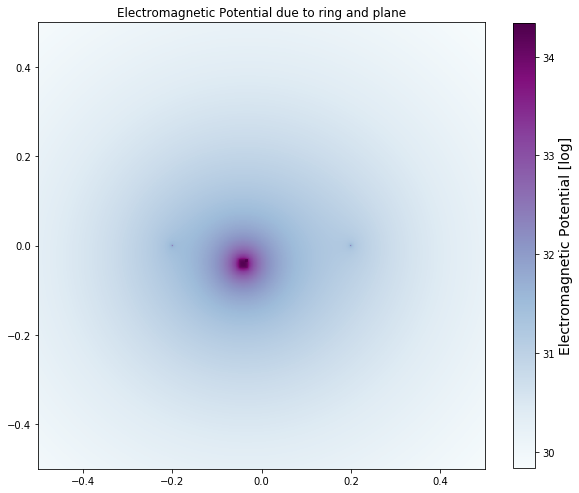

In [44]:
fig=plt.figure(figsize=(10,10))
ax6=fig.add_subplot(111)

V=np.log(V_tot)
image4=ax6.imshow(V, origin='lower',cmap='BuPu',extent=(-0.5, 0.5, -0.5, 0.5))
ax6.set_title('Electromagnetic Potential due to ring and plane')
cbar3 = plt.colorbar(image4, pad=0.05,fraction=0.15,shrink=0.82)
cbar3.set_label('Electromagnetic Potential [log]', size=14)
plt.show()
fig.savefig('Vring&plane.pdf')

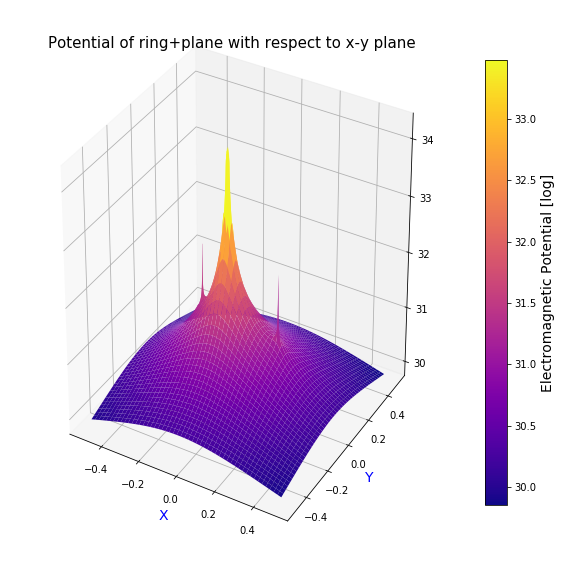

In [45]:
fig=plt.figure(figsize=(10,10))
ax7=fig.gca(projection='3d')
im5=ax7.plot_surface(X,Y,V,cmap='plasma')
ax7.set_title('Potential of ring+plane with respect to x-y plane ',size=15)
ax7.set_xlabel('X',size=14,color='b')
ax7.set_ylabel('Y',size=14,color='b')
cbar4 = plt.colorbar(im5, pad=0.05,fraction=0.15,shrink=0.82)
cbar4.set_label('Electromagnetic Potential [log]', size=14)
plt.show()
fig.savefig('V_ring&plane3D.pdf')

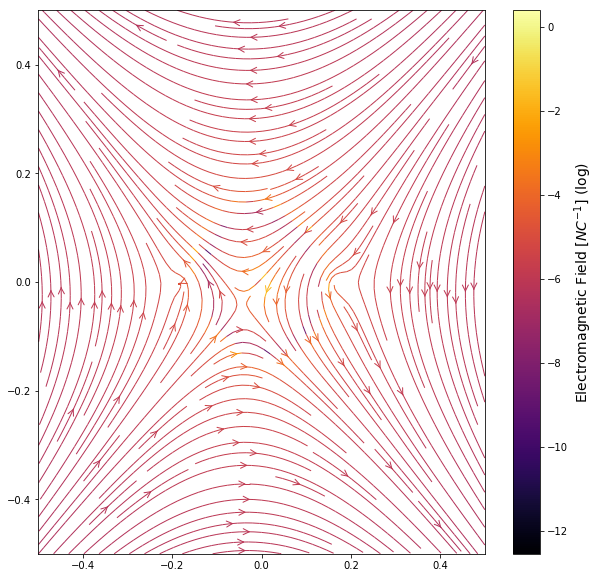

In [40]:
#Calculate the E field
E_tot=np.gradient(V_tot)

#Let us plot the E field
fig=plt.figure(figsize=(10,10))
ax8=fig.add_subplot(111)
c = np.log(np.hypot(E_tot[0],E_tot[1]))
strm3=ax8.streamplot(X, Y, E_tot[0], E_tot[1], linewidth=1,color=color2, cmap='inferno',density=2, arrowstyle='->', arrowsize=1.5)
colorbar=fig.colorbar(strm3.lines)
colorbar.set_label('Electromagnetic Field [$N C^{-1}$] (log)', size=14)
ax8.set_title('Electromagnetic Field')
plt.show()
fig.savefig('E_r&p_streamplot.pdf')

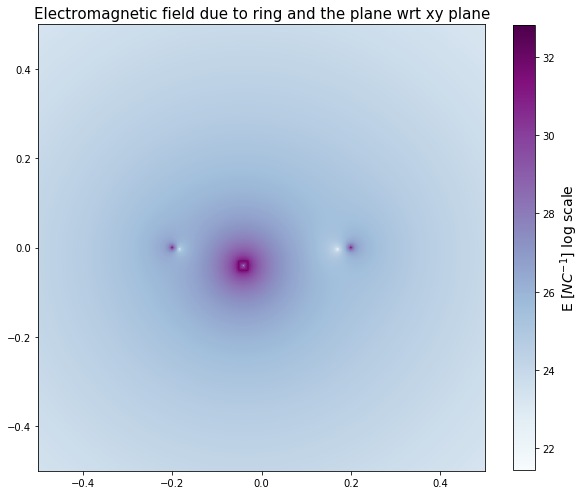

In [25]:
fig=plt.figure(figsize=(10,10))
ax9=fig.add_subplot(111)

image5=ax9.imshow(c, origin='lower',cmap='BuPu',extent=(-0.5, 0.5, -0.5, 0.5))

ax9.set_title('Electromagnetic field due to ring and the plane wrt xy plane',size=15)
cbar5 = plt.colorbar(image5, pad=0.05,fraction=0.15,shrink=0.82)
cbar5.set_label('E [$N C^{-1}$] log scale', size=14)
plt.show()
fig.savefig('E_r&p.pdf')

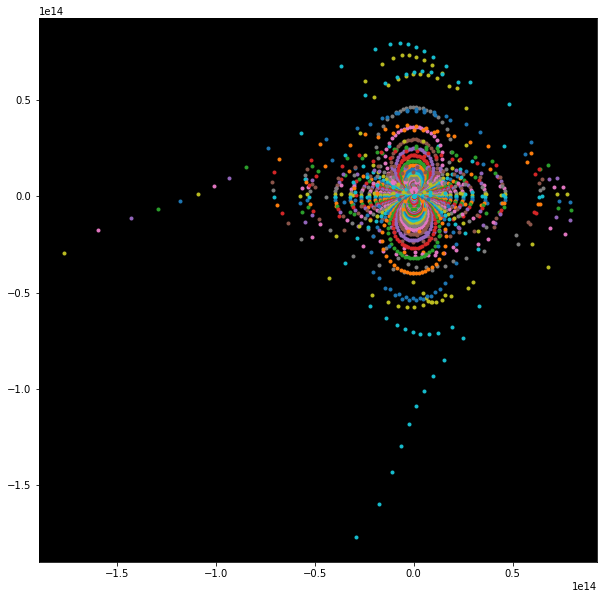

In [38]:
fig=plt.figure(figsize=(10,10))
ax11=fig.add_subplot(111)
ax11.plot(E_tot[0],E_tot[1],'.')
ax11.set_facecolor('k')
plt.show()
fig.savefig('modernart.jpg')
#some modern art for your entertainment

In [ ]:
# fig=plt.figure(figsize=(10,10))
# ax10=fig.add_subplot(111)

# image6=ax10.imshow(V1, origin='lower',cmap='BuPu',extent=(-0.5, 0.5, -0.5, 0.5))

# ax10.set_title('Electromagnetic field due to ring and the plane wrt xy plane',size=15)
# cbar6 = plt.colorbar(image6, pad=0.05,fraction=0.15,shrink=0.82)
# cbar6.set_label('E [$N C^{-1}$] log scale', size=14)
# plt.show()